In [130]:
#importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
#importing dataset
df=pd.read_csv('data_1.csv')

# 1.Data understanding and exploration


In [132]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [133]:
df.shape

(301, 9)

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [135]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [136]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

# 2.Data cleaning


In [137]:
df.Car_Name.unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [138]:
df.loc[df.duplicated()]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


In [139]:
df.isnull().sum()   #no null values

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

C:\Users\Gauri\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


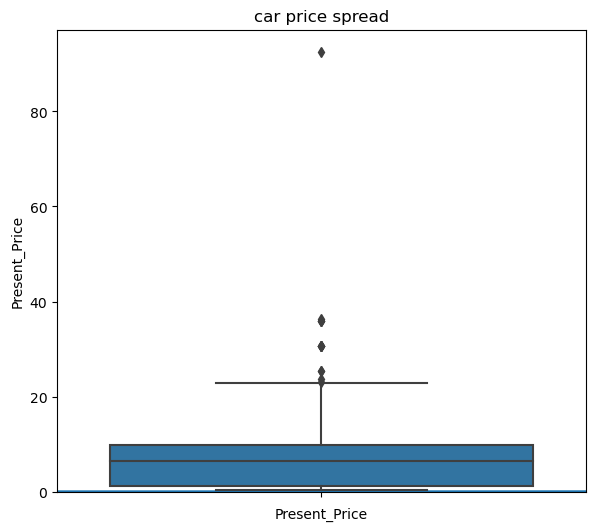

In [140]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('car price distribution')
sns.distplot(df.Present_Price)

plt.subplot(1,2,1)
plt.title('car price spread')
sns.boxplot(y=df.Present_Price)
plt.show()

In [141]:
print(df.Present_Price.describe(percentiles=[0.25,0.50,0.75,0.85,0.90,1]))

count    301.000000
mean       7.628472
std        8.644115
min        0.320000
25%        1.200000
50%        6.400000
75%        9.900000
85%       13.600000
90%       14.790000
100%      92.600000
max       92.600000
Name: Present_Price, dtype: float64


In [142]:
#outliers is present


C:\Users\Gauri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1000x1000 with 0 Axes>

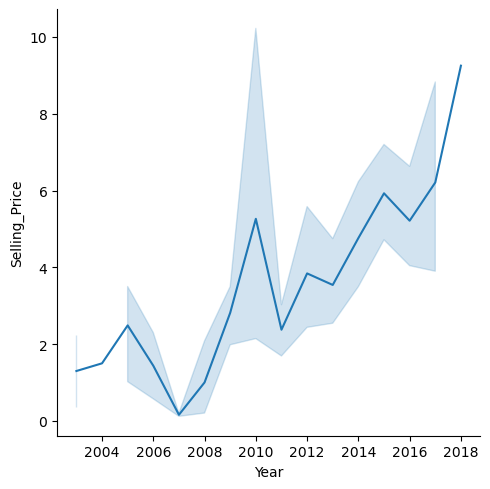

In [143]:
fig=plt.figure(figsize=(10,10))
sns.relplot('Year','Selling_Price',data=df,kind='line')

In [144]:
df['Selling_Price'].describe()   #max selling is 35 lakh min selling is 10k

count    301.000000
mean       4.661296
std        5.082812
min        0.100000
25%        0.900000
50%        3.600000
75%        6.000000
max       35.000000
Name: Selling_Price, dtype: float64

C:\Users\Gauri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


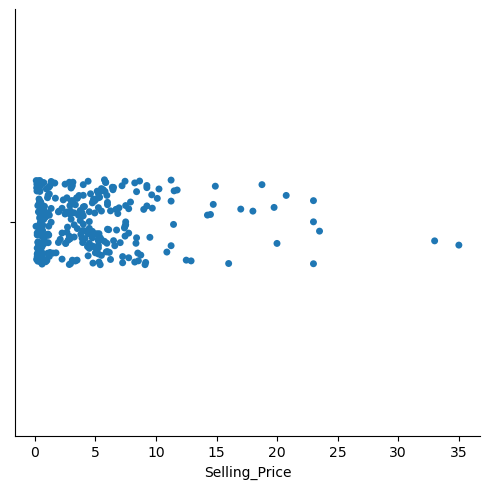

In [145]:
sns.catplot('Selling_Price',data=df)

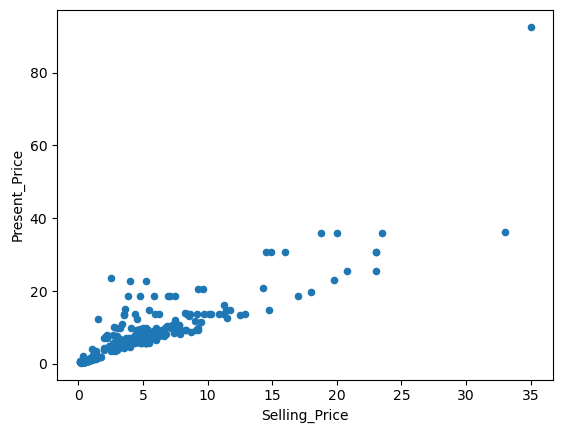

In [146]:
#relation b/w selling and present price
df.plot.scatter(x='Selling_Price',y='Present_Price');

C:\Users\Gauri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='count'>

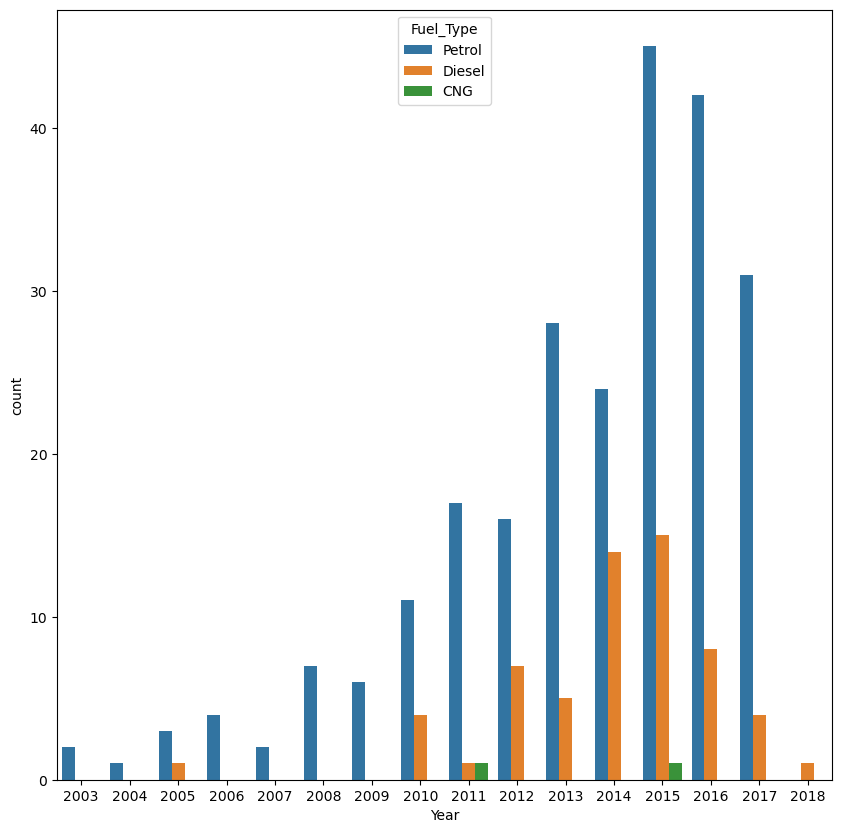

In [147]:
plt.figure(figsize=(10,10))
sns.countplot('Year',hue='Fuel_Type',data=df)

In [148]:
#observation petrol car are selling more than cng

C:\Users\Gauri\anaconda3\lib\site-packages\seaborn\categorical.py:2805: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


<Figure size 500x500 with 0 Axes>

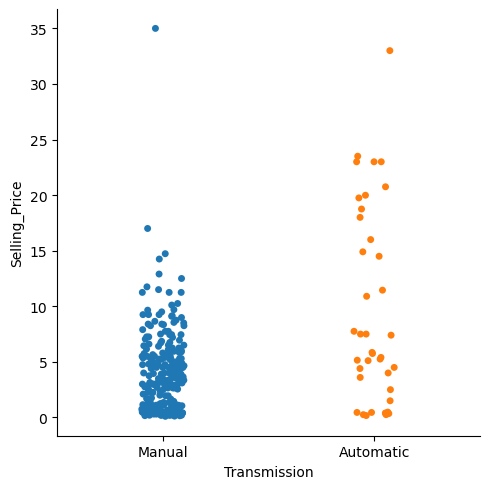

In [149]:
plt.figure(figsize=(5,5))
sns.catplot(data=df, x='Transmission',y='Selling_Price',split=True)

In [150]:
#observation automatic has higher selling price than manul eve though the number of automatic car is less

<AxesSubplot:xlabel='Selling_Price', ylabel='Kms_Driven'>

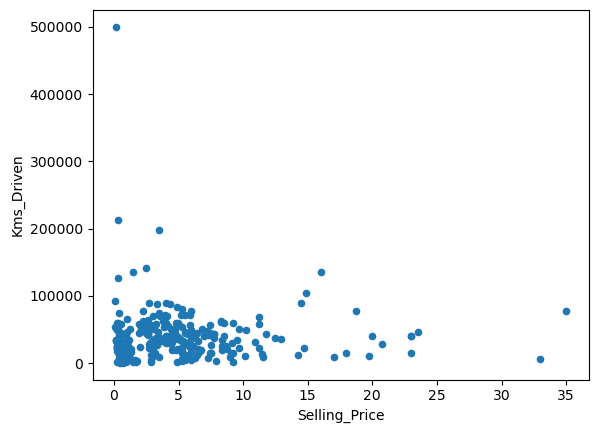

In [151]:
df.plot.scatter('Selling_Price','Kms_Driven')  #checking plot between km and selling price

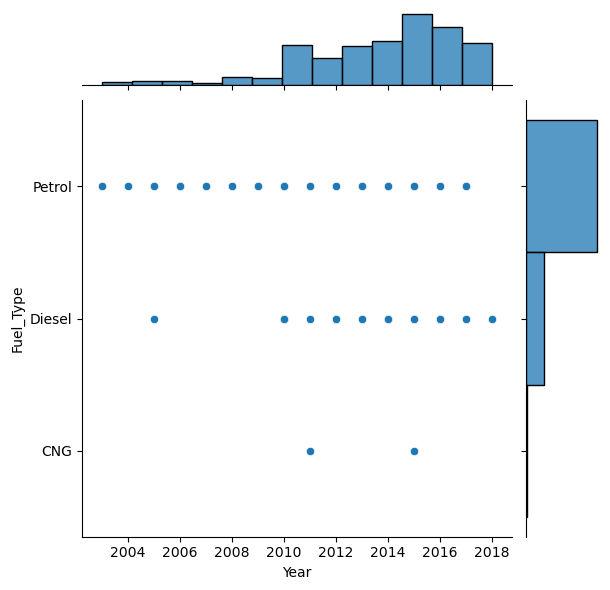

In [152]:
sns.jointplot(data=df,x='Year',y='Fuel_Type')

<AxesSubplot:xlabel='Selling_Price', ylabel='Seller_Type'>

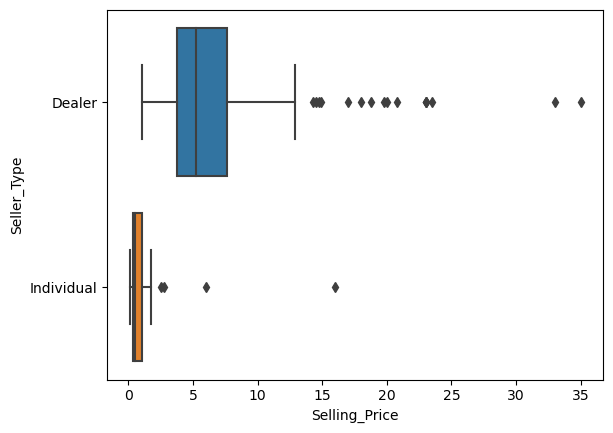

In [153]:
sns.boxplot(data=df,x='Selling_Price',y='Seller_Type')

<AxesSubplot:xlabel='Year', ylabel='Selling_Price'>

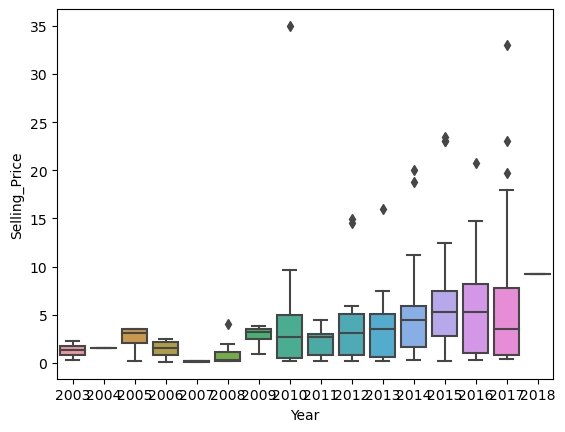

In [154]:
sns.boxplot(data=df,x='Year',y='Selling_Price')

In [205]:
#dropping car name column
df.drop('Car_Name',axis=1,inplace=True)

KeyError: "['Car_Name'] not found in axis"

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Selling_Price           301 non-null    float64
 1   Present_Price           301 non-null    float64
 2   Kms_Driven              301 non-null    int64  
 3   Owner                   301 non-null    int64  
 4   Years                   301 non-null    int64  
 5   Fuel_Type_Diesel        301 non-null    uint8  
 6   Fuel_Type_Petrol        301 non-null    uint8  
 7   Seller_Type_Individual  301 non-null    uint8  
 8   Transmission_Manual     301 non-null    uint8  
 9   curr_Year               301 non-null    int64  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 15.4 KB


In [187]:
df.head(5)

,Selling_Price,Present_Price,Kms_Driven,Owner,Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1


In [188]:
df.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'Years',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual'],
      dtype='object')

In [189]:
#converting year into no of years selling car is old

In [190]:
df['curr_Year']=2023
df['Years']=df.curr_Year-df.Year
df.drop(['Year','curr_Year'],axis=1,inplace=True)



AttributeError: 'DataFrame' object has no attribute 'Year'

In [191]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,curr_Year
0,3.35,5.59,27000,0,9,0,1,0,1,2023
1,4.75,9.54,43000,0,10,1,0,0,1,2023
2,7.25,9.85,6900,0,6,0,1,0,1,2023
3,2.85,4.15,5200,0,12,0,1,0,1,2023
4,4.60,6.87,42450,0,9,1,0,0,1,2023


# 3.Data preparation


In [192]:
#seeing categorogical data

In [193]:
cat_col=df.select_dtypes(include='object')
for i in cat_col:
    print('column name--'.format(i,df[i].nunique(),df[i].unique()))

In [194]:
df=pd.get_dummies(df,drop_first=True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,curr_Year
0,3.35,5.59,27000,0,9,0,1,0,1,2023
1,4.75,9.54,43000,0,10,1,0,0,1,2023
2,7.25,9.85,6900,0,6,0,1,0,1,2023
3,2.85,4.15,5200,0,12,0,1,0,1,2023
4,4.60,6.87,42450,0,9,1,0,0,1,2023


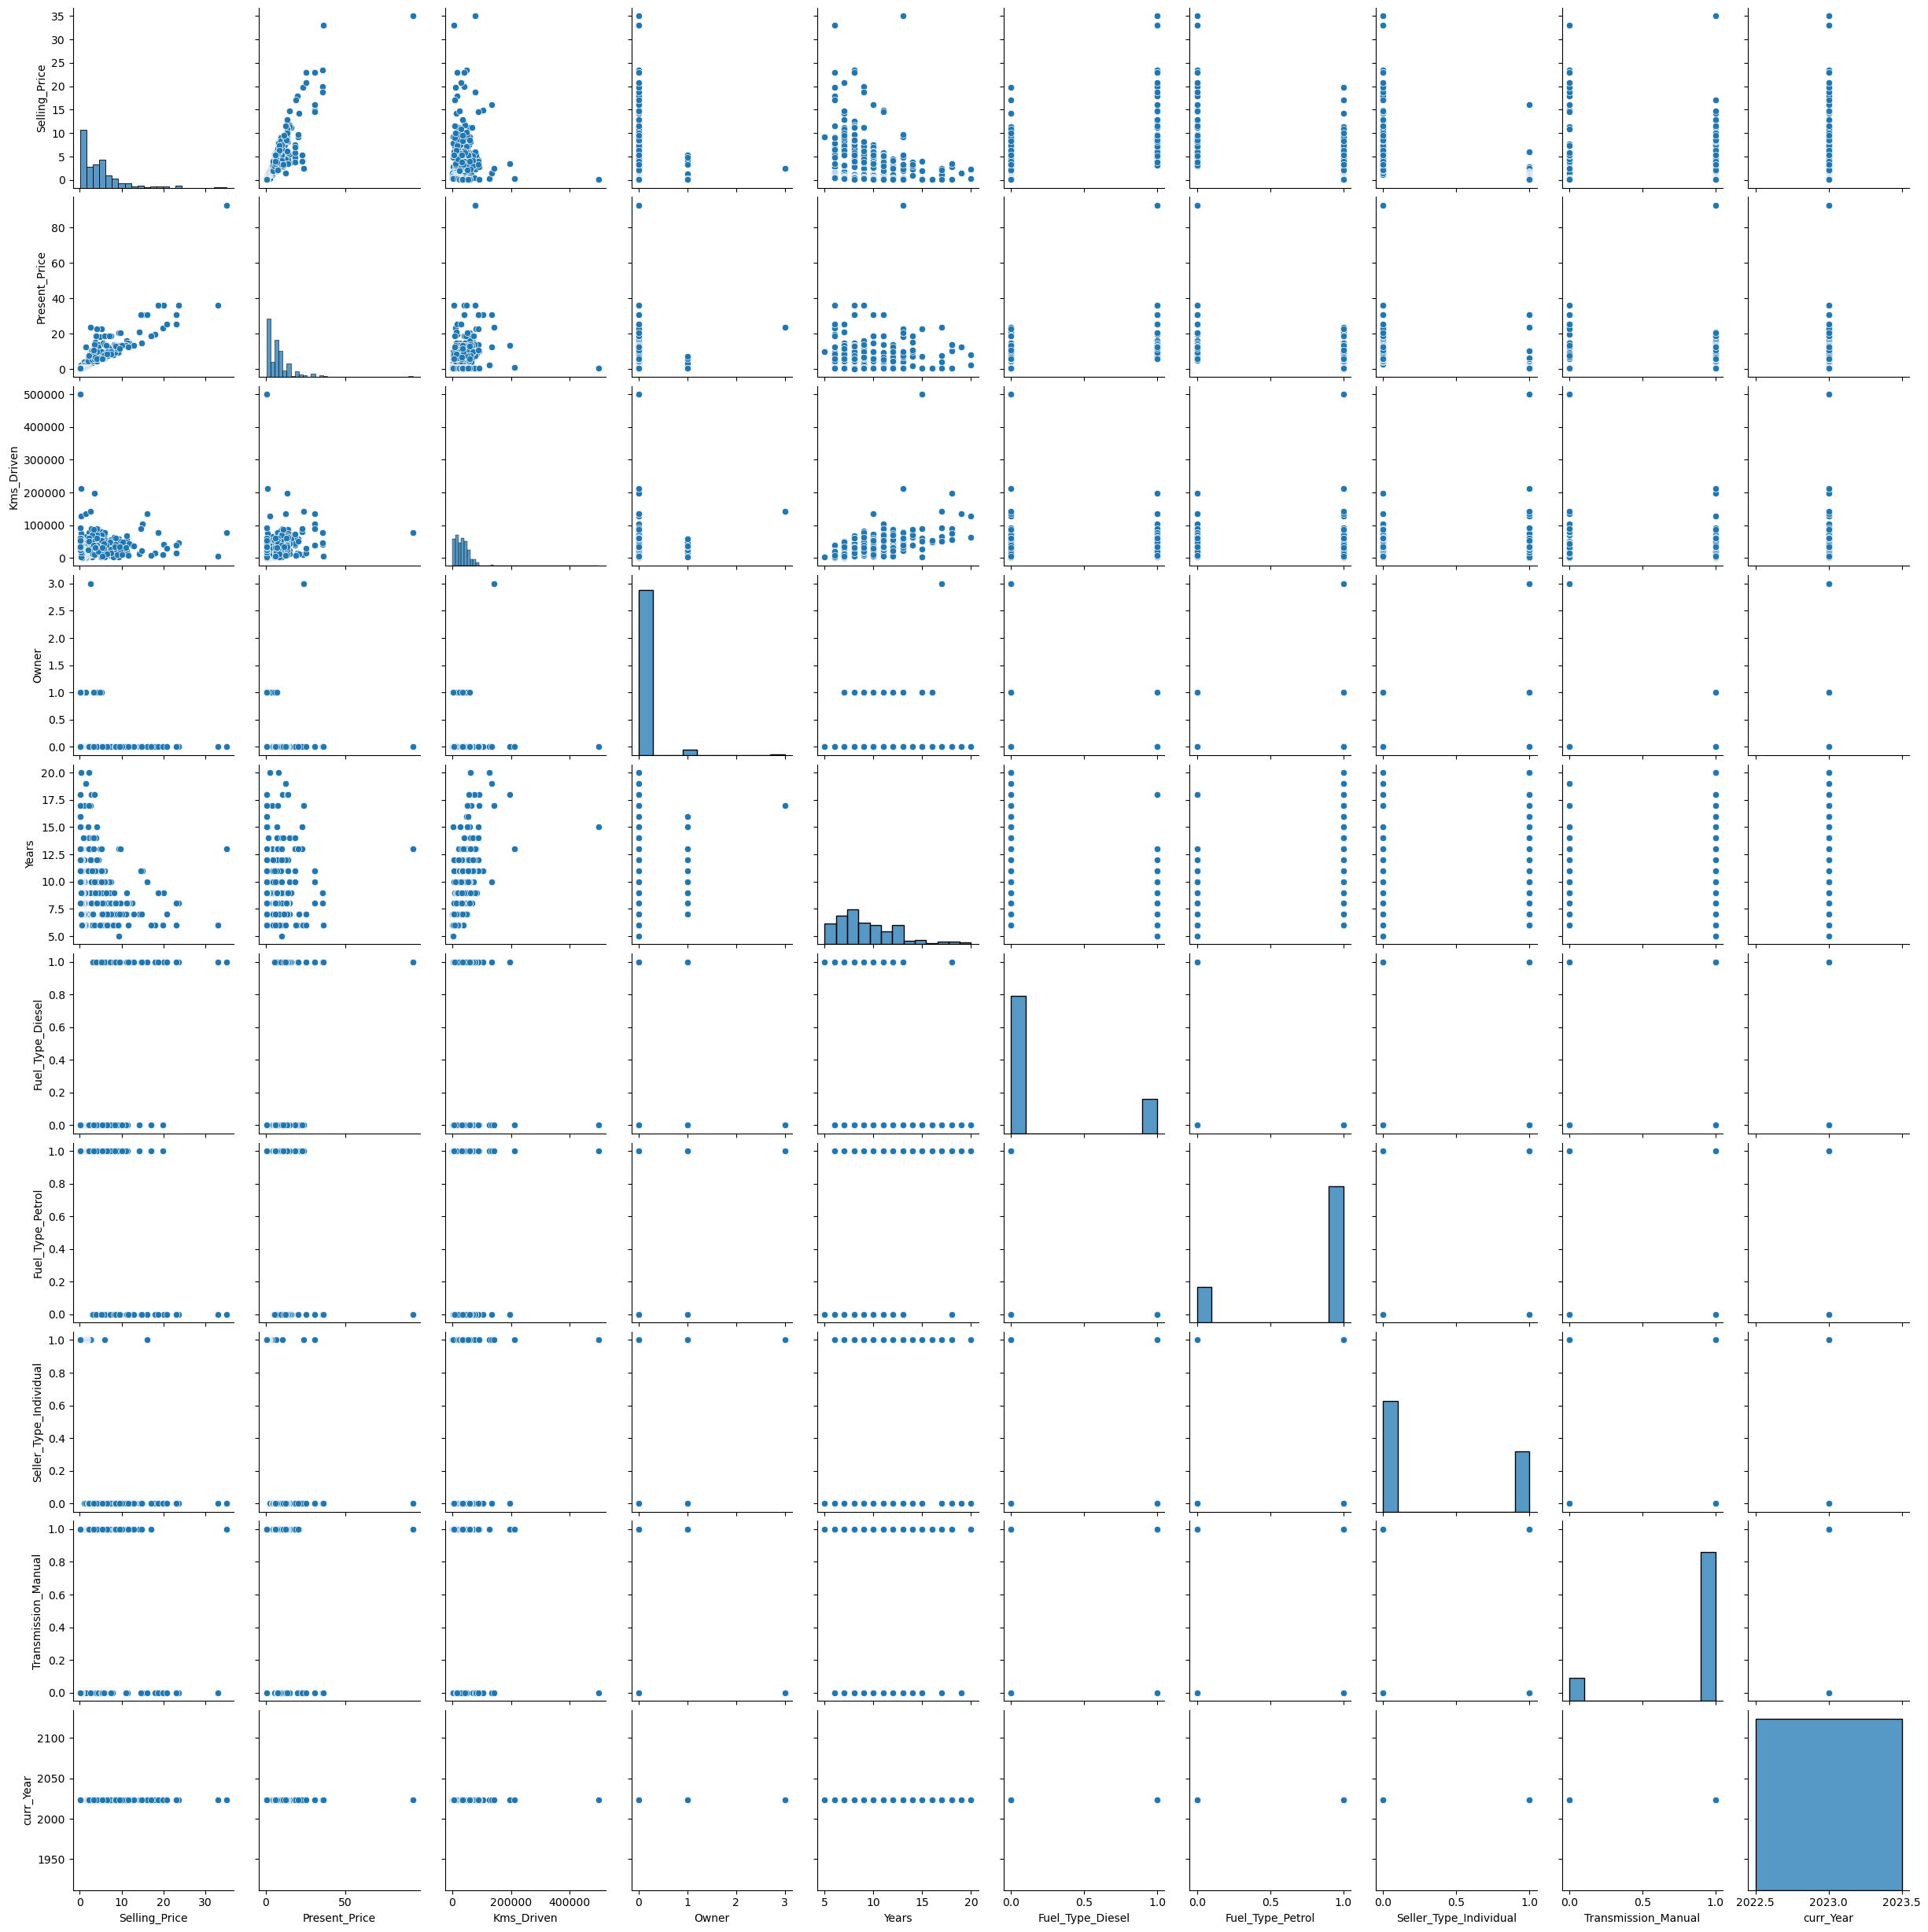

In [195]:
sns.pairplot(data=df)

In [196]:
#heatmap correlation

<AxesSubplot:>

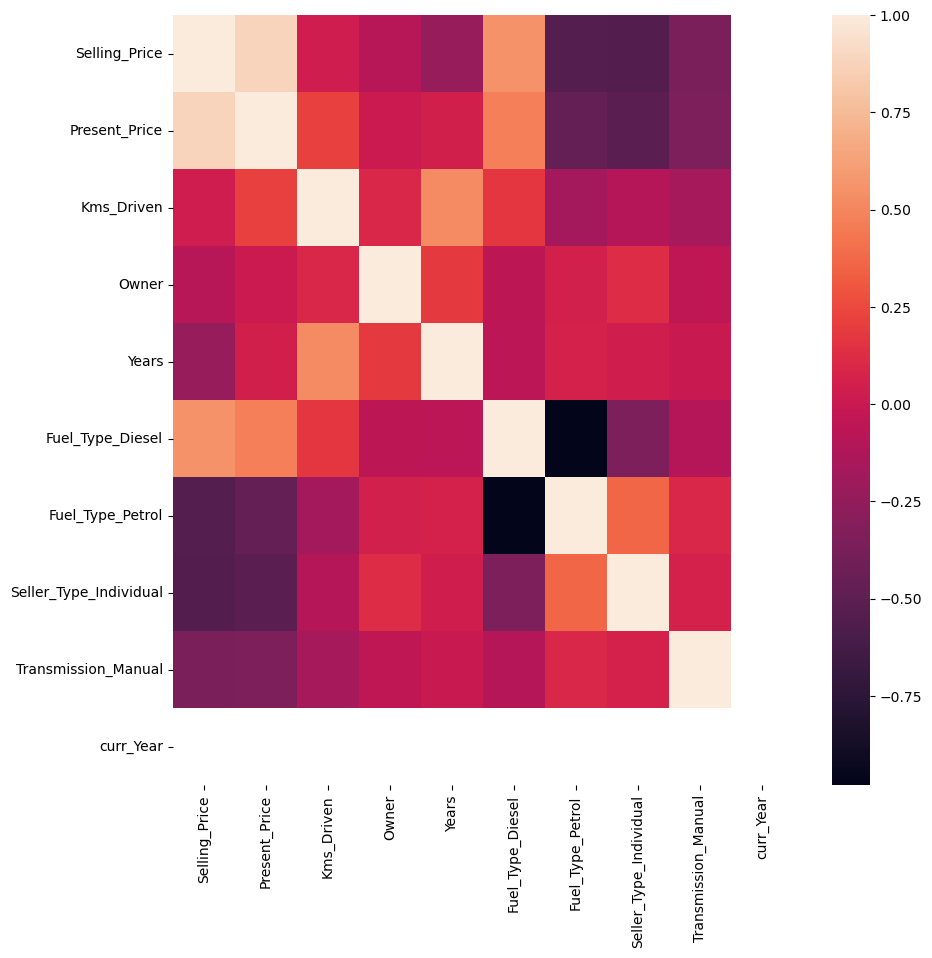

In [197]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

In [198]:
#taking dependent and independent columns

In [199]:
X=df.drop('Selling_Price',axis=1)   #x is dependent y is independent


In [200]:
y=df['Selling_Price']

In [201]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [202]:
X

,Present_Price,Kms_Driven,Owner,Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,curr_Year
0,5.59,27000,0,9,0,1,0,1,2023
1,9.54,43000,0,10,1,0,0,1,2023
2,9.85,6900,0,6,0,1,0,1,2023
3,4.15,5200,0,12,0,1,0,1,2023
4,6.87,42450,0,9,1,0,0,1,2023
...,...,...,...,...,...,...,...,...,...
296,11.60,33988,0,7,1,0,0,1,2023
297,5.90,60000,0,8,0,1,0,1,2023
298,11.00,87934,0,14,0,1,0,1,2023
299,12.50,9000,0,6,1,0,0,1,2023


In [203]:
y.shape

(301,)

In [204]:
X.shape

(301, 9)

# 4.Model building and evaluation

In [228]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=41)

In [229]:
from sklearn import preprocessing
from sklearn import utils
l=preprocessing.LabelEncoder()
y_transform=l.fit_transform(y)
y_transform

array([ 59,  78, 112,  52,  76, 128, 107, 104, 124, 114,  52, 108, 115,
        99,  45, 116, 112, 116,  58,  49,  52,  81,  74,  47,  53,  55,
        72,  98,  42, 114,  56,  46,  82,  98,  91,  54,  77,  11,  55,
        45,  95,  48,  42,  91,  35, 115,  49,  30,  94, 116, 144, 152,
       147, 145,  51,  64,  75,  78,  71, 150, 109,  75, 148, 153, 154,
        78, 149, 128,  73, 141,  69,  75, 114,  49,  81,  69,  91,  38,
        87, 142, 143,  78, 152, 139,  61,  47, 155,  96,  60,  78,  67,
       135,  63, 152,  70,  95, 151, 146, 110, 130,  41,  40,  39,  37,
        36,  36,  36,  35,  34,  34,  34,  33,  33,  33,  33,  32,  31,
        31,  31,  30,  30,  30,  30,  29,  28,  27,  27,  24,  26,  25,
        24,  24,  24,  23,  22,  22,  22,  22,  21,  21,  21,  21,  21,
        21,  21,  21,  20,  20,  19,  18,  17,  17,  17,  17,  17,  16,
        16,  16,  16,  15,  15,  15,  15,  15,  15,  15,  15,  14,  14,
        13,  13,  13,  13,  13,  12,  12,  11,  11,  11,  10,   

ValueError: y should be a 1d array, got an array of shape (301, 9) instead.

In [230]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [231]:
from sklearn.ensemble import RandomForestClassifier


In [232]:
m=RandomForestClassifier()
m=RandomForestClassifier(n_estimators=200,criterion='entropy',random_state=1)


In [178]:
#model building

In [236]:
m=m.fit(X_train,y_train)

ValueError: Unknown label type: 'continuous'

In [ ]:
m

In [182]:
y_pred=m.predict(X_test)
y_pred

AttributeError: 'RandomForestClassifier' object has no attribute 'n_classes_'

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
c=confusion_matrix(y_test,y_pred)
c

# 5.Result with error calculation


In [129]:
#ERROR

In [209]:
from sklearn import metrics

In [210]:
metrics.mean_squared_error(y_test,y_pred)

NameError: name 'y_pred' is not defined